# Headers and Functions

In [1]:
#Import libraries
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib import pyplot as plt
%matplotlib inline
#default settings for S,P,and M
S_init={'s','sp'};
P_init={'p','sp'};

#Some S is P: nothing to do
def someSisP(s_in,p_in):
    s_out=s_in;
    s_out.add('sp+');
    return [s_out,p_in]

#Some S is not P: nothing to do 
def someSisNotP(s_in,p_in):
    s_in.add('s+');
    return [s_in,p_in]

#All S is P: overwrite the original s_in with just the intersection of s_in and p_in
def allSisP(s_in,p_in):
    s_out=s_in.intersection(p_in);
    return [s_out,p_in]

#No S is P: remove the intersection of s_in and p_in from s_in
def noSisP(s_in,p_in):
    sp_intersection=s_in.intersection(p_in);
    s_in.difference_update(sp_intersection);
    return [s_in,p_in]

#initAandB: initialize subject and predicate sets 
#example: [S,P]=initSandP();
def initSandP():
    s_in=S_init.copy();
    p_in=P_init.copy(); 
    return [s_in,p_in];

#venn2_pretty: 
def venn2_pretty(S,S_label,P,P_label,Title):
  s_flag=0;
  sp_flag=0;
  if 's+' in S:
    s_flag=1;
    S.discard('s+');
  if 'sp+' in S:
    sp_flag=1;
    S.discard('sp+');
  v=venn2_unweighted([S,P],set_labels=(S_label,P_label));
  for t in v.set_labels: t.set_fontsize(25);
  venn2_circles((1,1,1),linewidth=4);
  #color all areas navy and remove the displayed count
  v.get_patch_by_id('01').set_color('w');
  v.get_label_by_id('01').set_text('');
  v.get_patch_by_id('11').set_color('w');
  v.get_label_by_id('11').set_text('');
  v.get_patch_by_id('10').set_color('w');
  v.get_label_by_id('10').set_text('');

  if 's' not in S:
    v.get_patch_by_id('10').set_color('b');
    v.get_patch_by_id('10').set_alpha(1.0);
  if 'sp' not in S:
    v.get_patch_by_id('11').set_color('b');
    v.get_patch_by_id('11').set_alpha(1.0);
  if 'p' not in P:
    v.get_patch_by_id('01').set_color('b');
    v.get_patch_by_id('01').set_alpha(1.0);
  if 'sp' not in P:
    v.get_patch_by_id('11').set_color('b');
    v.get_patch_by_id('11').set_alpha(1.0);
  if s_flag==1:
    v.get_patch_by_id('10').set_color('r');
    v.get_patch_by_id('10').set_alpha(1.0);
    v.get_label_by_id('10').set_text('X');
    v.get_label_by_id('10').set_fontsize(24);
  if sp_flag==1:
    v.get_patch_by_id('11').set_color('r');
    v.get_patch_by_id('11').set_alpha(1.0);
    v.get_label_by_id('11').set_text('X');
    v.get_label_by_id('11').set_fontsize(24);

  plt.title(Title,fontdict={'fontsize': 25});
  return v;

# Examples

## All men are mortal Example

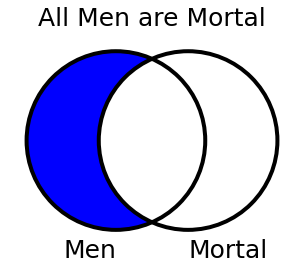

In [2]:
#initialize the subject and predicate sets
[subject,predicate]=initSandP();

#apply All men (S) are mortal (P)
[subject,predicate]=allSisP(subject,predicate);

#Venn diagram of all S is P
venn2_pretty(subject,'Men', predicate, 'Mortal','All Men are Mortal');

## No men are mortal Example

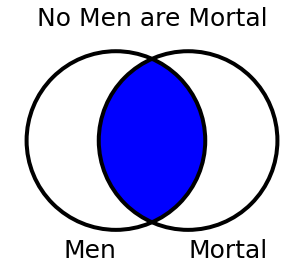

In [3]:
#initialize the subject and predicate sets
[subject,predicate]=initSandP();

#apply No men (S) are mortal (P)
[subject,predicate]=noSisP(subject,predicate);

#Venn diagram of no S is P
venn2_pretty(subject,'Men', predicate, 'Mortal','No Men are Mortal');

## Some men are mortal Example

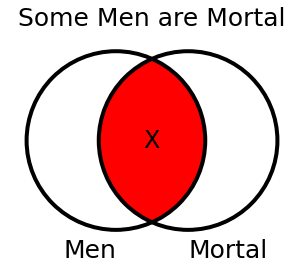

In [4]:
#initialize the subject and predicate sets
[subject,predicate]=initSandP();

#apply Some men (S) are mortal (P)
[subject,predicate]=someSisP(subject,predicate);

#Venn diagram of some S is P
venn2_pretty(subject,'Men', predicate, 'Mortal','Some Men are Mortal');

##Some Men are not Mortal

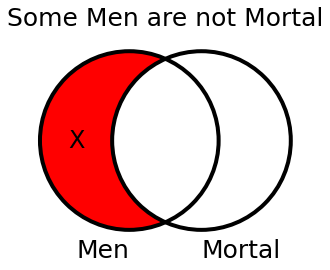

In [5]:
#initialize the subject and predicate sets
[subject,predicate]=initSandP();

#apply Some men (S) are not mortal (P)
[subject,predicate]=someSisNotP(subject,predicate);

#Venn diagram of some S is not P
venn2_pretty(subject,'Men', predicate, 'Mortal','Some Men are not Mortal');

# My Venn Diagrams